In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# MSL

In [25]:
msl_train_path = './dataset/msl/MSL_train.npy'
msl_test_path = './dataset/msl/MSL_test.npy'
msl_tesl_label_path = './dataset/msl/MSL_test_label.npy'
msl_train = np.load(msl_train_path, allow_pickle=True)
msl_test = np.load(msl_test_path, allow_pickle=True)
msl_test_label = np.load(msl_tesl_label_path, allow_pickle=True)
print(msl_train.shape, msl_test.shape, msl_test_label.shape)

(58317, 55) (73729, 55) (73729,)


In [26]:
print(msl_train[0])

[2.14664587 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


# SMD

In [7]:
smd_train_path = './dataset/smd/SMD_train.npy'
smd_test_path = './dataset/smd/SMD_test.npy'
smd_test_labels_path = './dataset/smd/SMD_test_label.npy'
smd_train = np.load(smd_train_path, allow_pickle=True)
smd_test = np.load(smd_test_path, allow_pickle=True)
smd_test_labels = np.load(smd_test_labels_path, allow_pickle=True)
print(smd_train.shape, smd_test.shape, smd_test_labels.shape)

(708405, 38) (708420, 38) (708420,)


In [9]:
smd_train_df = pd.DataFrame(smd_train)
smd_test_df = pd.DataFrame(smd_test)
smd_test_labels_df = pd.DataFrame(smd_test_labels)
# 打印统计信息
print(smd_train_df.describe())
print(smd_test_df.describe())
print(smd_test_labels_df.describe())

                  0              1              2              3   \
count  708405.000000  708405.000000  708405.000000  708405.000000   
mean        0.135608       0.070325       0.081224       0.095481   
std         0.137656       0.110738       0.128426       0.157387   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.032258       0.003363       0.004544       0.005624   
50%         0.090909       0.023305       0.029070       0.031166   
75%         0.193548       0.081597       0.088327       0.096535   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6         7              8   \
count  708405.000000  708405.000000  708405.000000  708405.0  708405.000000   
mean        0.263753       0.722551       0.394186       0.0       0.020008   
std         0.416208       0.294917       0.323389       0.0       0.051387   
min         0.000000       0.000000       0.000000       0.0  

In [11]:
smd_test_labels_df.value_counts()

0  
0.0    678976
1.0     29444
Name: count, dtype: int64

In [12]:
# 查看是否有缺失值
print(smd_train_df.isnull().sum().sum())
print(smd_test_df.isnull().sum().sum())
print(smd_test_labels_df.isnull().sum().sum())

0
0
0


In [14]:
# smd_test_labels_df 并入 smd_test_df
smd_test_df['label'] = smd_test_labels_df[0]
smd_test_df['label'] = smd_test_df['label'].astype(int)
smd_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,label
0,0.010101,0.001251,0.001553,0.002391,0.0,0.628024,0.031016,0.0,0.000000,0.0,...,0.2,0.039216,0.012987,0.0,0.030769,0.120125,0.121685,0.0,0.0,0
1,0.010101,0.001720,0.001664,0.002630,0.0,0.628895,0.033155,0.0,0.000000,0.0,...,0.2,0.042539,0.025974,0.0,0.026374,0.121685,0.121685,0.0,0.0,0
2,0.010101,0.001486,0.001553,0.002630,0.0,0.629765,0.035294,0.0,0.000000,0.0,...,0.2,0.045862,0.025974,0.0,0.026374,0.121685,0.121685,0.0,0.0,0
3,0.020202,0.001642,0.001664,0.002630,0.0,0.630287,0.035829,0.0,0.000000,0.0,...,0.2,0.293785,0.051948,0.0,0.043956,0.244930,0.244930,0.0,0.0,0
4,0.010101,0.004848,0.003882,0.004304,0.0,0.630635,0.036364,0.0,0.564103,0.0,...,0.2,0.051844,0.012987,0.0,0.032967,0.123245,0.123245,0.0,0.0,0


In [15]:
# smd_train_df 的 label 取 0
smd_train_df['label'] = 0
smd_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,label
0,0.010101,0.001642,0.001996,0.002630,0.0,0.987293,0.059893,0.0,0.0,0.000000,...,0.2,0.100698,0.000000,0.0,0.030769,0.141966,0.141966,0.0,0.0,0
1,0.010101,0.000626,0.001553,0.002391,0.0,0.834117,0.060428,0.0,0.0,0.000678,...,0.2,0.082419,0.051948,0.0,0.035165,0.149766,0.149766,0.0,0.0,0
2,0.010101,0.000235,0.001109,0.002152,0.0,0.681114,0.061497,0.0,0.0,0.001055,...,0.2,0.088069,0.000000,0.0,0.030769,0.135725,0.135725,0.0,0.0,0
3,0.010101,0.000938,0.001109,0.002152,0.0,0.681462,0.060963,0.0,0.0,0.000000,...,0.2,0.093054,0.012987,0.0,0.035165,0.148206,0.148206,0.0,0.0,0
4,0.010101,0.001173,0.001220,0.002152,0.0,0.681462,0.060428,0.0,0.0,0.000000,...,0.2,0.109339,0.025974,0.0,0.030769,0.154446,0.154446,0.0,0.0,0


In [16]:
# 保存为csv文件
smd_train_df.to_csv('./dataset/smd/train.csv', index=False)
smd_test_df.to_csv('./dataset/smd/test.csv', index=False)

# SMAP

In [20]:
smap_train_path = './dataset/smap/SMAP_train.npy'
smap_test_path = './dataset/smap/SMAP_test.npy'
smap_test_labels_path = './dataset/smap/SMAP_test_label.npy'
smap_train = np.load(smap_train_path, allow_pickle=True)
smap_test = np.load(smap_test_path, allow_pickle=True)
smap_test_labels = np.load(smap_test_labels_path, allow_pickle=True)
print(smap_train.shape, smap_test.shape, smap_test_labels.shape)

(135183, 25) (427617, 25) (427617,)


In [21]:
smap_train_df = pd.DataFrame(smap_train)
smap_test_df = pd.DataFrame(smap_test)
# 打印描述性统计信息
print(smap_train_df.describe())
print(smap_test_df.describe())

                  0              1              2              3   \
count  135183.000000  135183.000000  135183.000000  135183.000000   
mean       -0.186839       0.027563       0.005356       0.021719   
std         0.788578       0.163717       0.072987       0.145764   
min        -1.000000       0.000000       0.000000       0.000000   
25%        -1.000000       0.000000       0.000000       0.000000   
50%        -0.373494       0.000000       0.000000       0.000000   
75%         0.664939       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  135183.000000  135183.000000  135183.000000  135183.000000   
mean        0.000259       0.128078       0.098008       0.001095   
std         0.016089       0.334178       0.297326       0.033070   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [19]:
smap_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SWaT

In [91]:
swat_normal_path = './dataset/swat/swat_train2.csv'
swat_attack_path = './dataset/swat/swat2.csv'
swat_normal = pd.read_csv(swat_normal_path)
swat_attack = pd.read_csv(swat_attack_path)

In [92]:
header1 = swat_normal.columns.values.tolist()
header2 = swat_attack.columns.values.tolist()
print(header1)
print(len(header1))
print(header2)
print(len(header2))

print(swat_normal.shape, swat_attack.shape)


['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack']
52
['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack']
52
(495000, 52)

In [95]:
# 查看各列缺失值情况
print(swat_normal.isnull().sum().sum())
print(swat_attack.isnull().sum().sum())
# 含有缺失值的列名称
print(swat_normal.columns[swat_normal.isnull().any()])
print(swat_attack.columns[swat_attack.isnull().any()])

0
0
Index([], dtype='object')
Index([], dtype='object')


# WADI

In [23]:
wadi_14days_path = './dataset/wadi/WADI_14days_new.csv'
wadi_attackdata_path = './dataset/wadi//WADI_attackdataLABLE.csv'
wadi_14days_data = pd.read_csv(wadi_14days_path)
wadi_attackdata_label = pd.read_csv(wadi_attackdata_path)

C:\Users\14680\AppData\Local\Temp\ipykernel_18116\3993650610.py:4: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  wadi_attackdata_label = pd.read_csv(wadi_attackdata_path)


In [24]:
headers_1 = wadi_14days_data.columns.tolist()
headers_2 = wadi_attackdata_label.columns.tolist()
print(headers_1)
print(headers_2)
print(len(headers_1), len(headers_2))
print(len(wadi_14days_data), len(wadi_attackdata_label))

['Row', 'Date', 'Time', '1_AIT_001_PV', '1_AIT_002_PV', '1_AIT_003_PV', '1_AIT_004_PV', '1_AIT_005_PV', '1_FIT_001_PV', '1_LS_001_AL', '1_LS_002_AL', '1_LT_001_PV', '1_MV_001_STATUS', '1_MV_002_STATUS', '1_MV_003_STATUS', '1_MV_004_STATUS', '1_P_001_STATUS', '1_P_002_STATUS', '1_P_003_STATUS', '1_P_004_STATUS', '1_P_005_STATUS', '1_P_006_STATUS', '2_DPIT_001_PV', '2_FIC_101_CO', '2_FIC_101_PV', '2_FIC_101_SP', '2_FIC_201_CO', '2_FIC_201_PV', '2_FIC_201_SP', '2_FIC_301_CO', '2_FIC_301_PV', '2_FIC_301_SP', '2_FIC_401_CO', '2_FIC_401_PV', '2_FIC_401_SP', '2_FIC_501_CO', '2_FIC_501_PV', '2_FIC_501_SP', '2_FIC_601_CO', '2_FIC_601_PV', '2_FIC_601_SP', '2_FIT_001_PV', '2_FIT_002_PV', '2_FIT_003_PV', '2_FQ_101_PV', '2_FQ_201_PV', '2_FQ_301_PV', '2_FQ_401_PV', '2_FQ_501_PV', '2_FQ_601_PV', '2_LS_001_AL', '2_LS_002_AL', '2_LS_101_AH', '2_LS_101_AL', '2_LS_201_AH', '2_LS_201_AL', '2_LS_301_AH', '2_LS_301_AL', '2_LS_401_AH', '2_LS_401_AL', '2_LS_501_AH', '2_LS_501_AL', '2_LS_601_AH', '2_LS_601_AL'

In [30]:
wadi_14days_data.head()

,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,1,9/25/2017,00:00.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
1,2,9/25/2017,00:01.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
2,3,9/25/2017,00:02.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
3,4,9/25/2017,00:03.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
4,5,9/25/2017,00:04.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68


In [32]:
wadi_attackdata_label.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
1,1,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
2,2,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
3,3,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
4,4,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1


In [33]:
# 测试集中表头有误
new_header = wadi_attackdata_label.iloc[0]
print(new_header)
wadi_attackdata_label = wadi_attackdata_label[1:]
wadi_attackdata_label.columns = new_header
wadi_attackdata_label.reset_index(drop=True, inplace=True)  # 重置索引

wadi_attackdata_label.head()

0                                       Row 
1                                      Date 
2                                       Time
3                               1_AIT_001_PV
4                               1_AIT_002_PV
                       ...                  
126                           3_P_004_STATUS
127                       LEAK_DIFF_PRESSURE
128                     PLANT_START_STOP_LOG
129                 TOTAL_CONS_REQUIRED_FLOW
130    Attack LABLE (1:No Attack, -1:Attack)
Name: 0, Length: 131, dtype: object


,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,1,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
1,2,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
2,3,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
3,4,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
4,5,10/9/17,00:04.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1


In [37]:
# 查看各列数据类型
print(wadi_14days_data.dtypes)
print()
print(wadi_attackdata_label.dtypes)

Row                           int64
Date                         object
Time                         object
1_AIT_001_PV                float64
1_AIT_002_PV                float64
                             ...   
3_P_003_STATUS                int64
3_P_004_STATUS                int64
LEAK_DIFF_PRESSURE          float64
PLANT_START_STOP_LOG          int64
TOTAL_CONS_REQUIRED_FLOW    float64
Length: 130, dtype: object

0
Row                                      object
Date                                     object
Time                                     object
1_AIT_001_PV                             object
1_AIT_002_PV                             object
                                          ...  
3_P_004_STATUS                           object
LEAK_DIFF_PRESSURE                       object
PLANT_START_STOP_LOG                     object
TOTAL_CONS_REQUIRED_FLOW                 object
Attack LABLE (1:No Attack, -1:Attack)    object
Length: 131, dtype: object


In [45]:
# 去掉前三列
wadi_14days_data = wadi_14days_data.iloc[:, 3:]
wadi_attackdata_label = wadi_attackdata_label.iloc[:, 3:]
# 将数据类型转换为float64
wadi_14days_data = wadi_14days_data.astype('float64')
wadi_attackdata_label = wadi_attackdata_label.astype('float64')

In [46]:
wadi_14days_data.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68
1,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68
2,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68
3,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0.0,0.0,47.7503,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.1948,1.0,0.68
4,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0.0,0.0,47.7503,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.1948,1.0,0.68


In [47]:
wadi_attackdata_label.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1.0
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1.0
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1.0
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1.0
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,1.0


In [59]:
# 查看各列数据类型
print(wadi_14days_data.dtypes)
print()
print(wadi_attackdata_label.dtypes)
print()
print(wadi_14days_data.columns[wadi_14days_data.dtypes != 'float64'])

1_AIT_001_PV                float64
1_AIT_002_PV                float64
1_AIT_003_PV                float64
1_AIT_004_PV                float64
1_AIT_005_PV                float64
                             ...   
3_P_003_STATUS              float64
3_P_004_STATUS              float64
LEAK_DIFF_PRESSURE          float64
PLANT_START_STOP_LOG        float64
TOTAL_CONS_REQUIRED_FLOW    float64
Length: 127, dtype: object

0
1_AIT_001_PV                             float64
1_AIT_002_PV                             float64
1_AIT_003_PV                             float64
1_AIT_004_PV                             float64
1_AIT_005_PV                             float64
                                          ...   
3_P_004_STATUS                           float64
LEAK_DIFF_PRESSURE                       float64
PLANT_START_STOP_LOG                     float64
TOTAL_CONS_REQUIRED_FLOW                 float64
Attack LABLE (1:No Attack, -1:Attack)    float64
Length: 128, dtype: object

Index([

In [ ]:
# 查看缺失值情况
print(wadi_14days_data.isnull().sum().sum())
print(wadi_attackdata_label.isnull().sum().sum())

# 查看是否有列全是缺失值
print(wadi_14days_data.isnull().all().sum())
print(wadi_attackdata_label.isnull().all().sum())

# 打印全是缺失值的列
print(wadi_14days_data.columns[wadi_14days_data.isnull().all()])
print(wadi_attackdata_label.columns[wadi_attackdata_label.isnull().all()])


3138318
691458
4
4
Index(['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS'], dtype='object')
Index(['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS'], dtype='object', name=0)


In [60]:
cols_to_drop = wadi_14days_data.columns[wadi_14days_data.isnull().all()]
print(cols_to_drop)
wadi_14days_data.drop(columns=cols_to_drop, inplace=True)
wadi_attackdata_label.drop(columns=cols_to_drop, inplace=True)
# 查看缺失值情况
print(wadi_14days_data.isnull().sum().sum())
print(wadi_attackdata_label.isnull().sum().sum())

Index(['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS'], dtype='object')
34
246


In [86]:
from sklearn.impute import SimpleImputer

# 处理缺失值
imputer = SimpleImputer(strategy='mean')
wadi_14days_data_imputed = imputer.fit_transform(wadi_14days_data)
wadi_attackdata_label_imputed = imputer.fit_transform(wadi_attackdata_label)
print(wadi_14days_data_imputed.shape)  
print(wadi_attackdata_label_imputed.shape)

# 将填充后的数据转换为DataFrame
wadi_14days_data_imputed = pd.DataFrame(wadi_14days_data_imputed, columns=wadi_14days_data.columns)
wadi_attackdata_label_imputed = pd.DataFrame(wadi_attackdata_label_imputed, columns=wadi_attackdata_label.columns)
# 查看缺失值情况
print(wadi_14days_data_imputed.isnull().sum().sum())
print(wadi_attackdata_label_imputed.isnull().sum().sum())

(784571, 123)
(172803, 124)
0
0


In [87]:
# 最后添加标签列 Attack LABLE (0:No Attack, 1:Attack)，全部填充为0
wadi_14days_data_imputed['Attack LABLE (0:No Attack, 1:Attack)'] = 0
wadi_14days_data_imputed.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (0:No Attack, 1:Attack)"
0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68,0
1,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68,0
2,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0.0,0.0,47.8911,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,67.9651,1.0,0.68,0
3,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0.0,0.0,47.7503,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,67.1948,1.0,0.68,0
4,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0.0,0.0,47.7503,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,67.1948,1.0,0.68,0


In [88]:
# 将最后一列标签的列名称改为 Attack LABLE (0:No Attack, 1:Attack)
wadi_attackdata_label_imputed.rename(columns={wadi_attackdata_label_imputed.columns[-1]: 'Attack LABLE (0:No Attack, 1:Attack)'}, inplace=True)
# 转成int类型，原-1改为1，1改为0
wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'] = wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'].astype(int)
wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'] = wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'].replace(1, 0)
wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'] = wadi_attackdata_label_imputed['Attack LABLE (0:No Attack, 1:Attack)'].replace(-1, 1)

wadi_attackdata_label_imputed.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (0:No Attack, 1:Attack)"
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,0
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,0
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,0
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,0
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0.0,0.0,48.482,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,62.6226,1.0,0.39,0


In [96]:
wadi_attackdata_label_imputed["Attack LABLE (0:No Attack, 1:Attack)"].value_counts()

Attack LABLE (0:No Attack, 1:Attack)
0    162826
1      9977
Name: count, dtype: int64

Text(0.5, 1.0, 'Attack LABLE (0:No Attack, 1:Attack)')

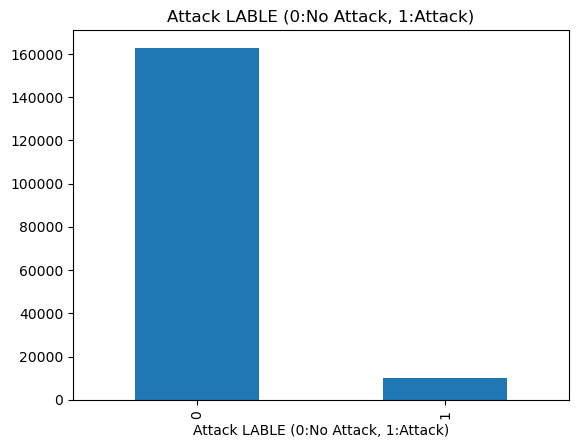

In [89]:
wadi_attackdata_label_imputed["Attack LABLE (0:No Attack, 1:Attack)"].value_counts().plot(kind='bar')
plt.title("Attack LABLE (0:No Attack, 1:Attack)")

In [90]:
# 保存
wadi_14days_data_imputed.to_csv('./dataset/wadi/WADI_14days_imputed.csv', index=False)
wadi_attackdata_label_imputed.to_csv('./dataset/wadi/WADI_attackdataLABLE_imputed.csv', index=False)